# SETD2
SETD2 is the primary methyltransferase catalyzing H3K36 trimethylation (H3K36me3)

In [2]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.7.1


### SETD2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SETD2.

In [3]:
gene_symbol = 'SETD2'
mane_tx_id = 'NM_014159.7'
mane_protein_id = 'NP_054878.5' # histone-lysine N-methyltransferase SETD2 isoform 1 [Homo sapiens]

In [14]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets, load_phenopacket_folder

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.21') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))


ppkt_d = "../../../phenopacket-store/notebooks/SETD2/phenopackets"

cohort_creator = configure_caching_cohort_creator(hpo)
#cohort, qc_results = load_phenopackets(  
#    phenopackets=phenopackets,
#    cohort_creator=cohort_creator,
#)
cohort, qc_results = load_phenopacket_folder(  
    pp_directory=ppkt_d,
    cohort_creator=cohort_creator,
)
qc_results.summarize()

Individuals Processed: 0individuals [00:00, ?individuals/s]

Expected a result but got an Error for variant: 3_47121197_47121197_G_A
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 9individuals [00:04,  2.10individuals/s]

Expected a result but got an Error for variant: 3_47120672_47120672_G_A
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 13individuals [00:07,  1.59individuals/s]

Expected a result but got an Error for variant: 3_47116623_47116623_C_G
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 17individuals [00:11,  1.38individuals/s]

Expected a result but got an Error for variant: 3_47123454_47123454_A_T
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 27individuals [00:20,  1.31individuals/s]

Expected a result but got an Error for variant: 3_47124539_47124539_C_T
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 32individuals [00:23,  1.42individuals/s]

Expected a result but got an Error for variant: 3_47122915_47122919_CAGAA_C
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 34individuals [00:26,  1.23individuals/s]

Expected a result but got an Error for variant: 3_47057485_47057485_T_C
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 40individuals [00:29,  1.48individuals/s]

Expected a result but got an Error for variant: 3_47103389_47103389_C_T
<html><body><h1>502 Bad Gateway</h1>
The server returned an invalid or incomplete response.
</body></html>



Individuals Processed: 45individuals [00:34,  1.29individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #8
   errors:
   ·Individual PMID_37372360_P12 has no genotype data (variants) to work with. Add variants or remove the individual from the analysis
    variants
      #0
       warnings:
       ·Individual PMID_37372360_P12 has an error with variant 3_47121197_47121197_G_A. Try again or remove variant from testing... Expected a result but got an Error. See log for details.
  patient #12
   errors:
   ·Individual PMID_37372360_P15 has no genotype data (variants) to work with. Add variants or remove the individual from the analysis
    variants
      #0
       warnings:
       ·Individual PMID_37372360_P15 has an error with variant 3_47120672_47120672_G_A. Try again or remove variant from testing... Expected a result but got an Error. See log for details.
  patient #16
   errors:
   ·Individual PMID_37372360_P1 has no genotype data (varian

In [6]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Delayed speech and language development,HP:0000750,29
Macrocephaly,HP:0000256,19
Global developmental delay,HP:0001263,19
Hypertelorism,HP:0000316,16
Hypotonia,HP:0001252,14
Autistic behavior,HP:0000729,12
Wide nasal bridge,HP:0000431,11
Obesity,HP:0001513,11
Micrognathia,HP:0000347,11
Highly arched eyebrow,HP:0002553,11


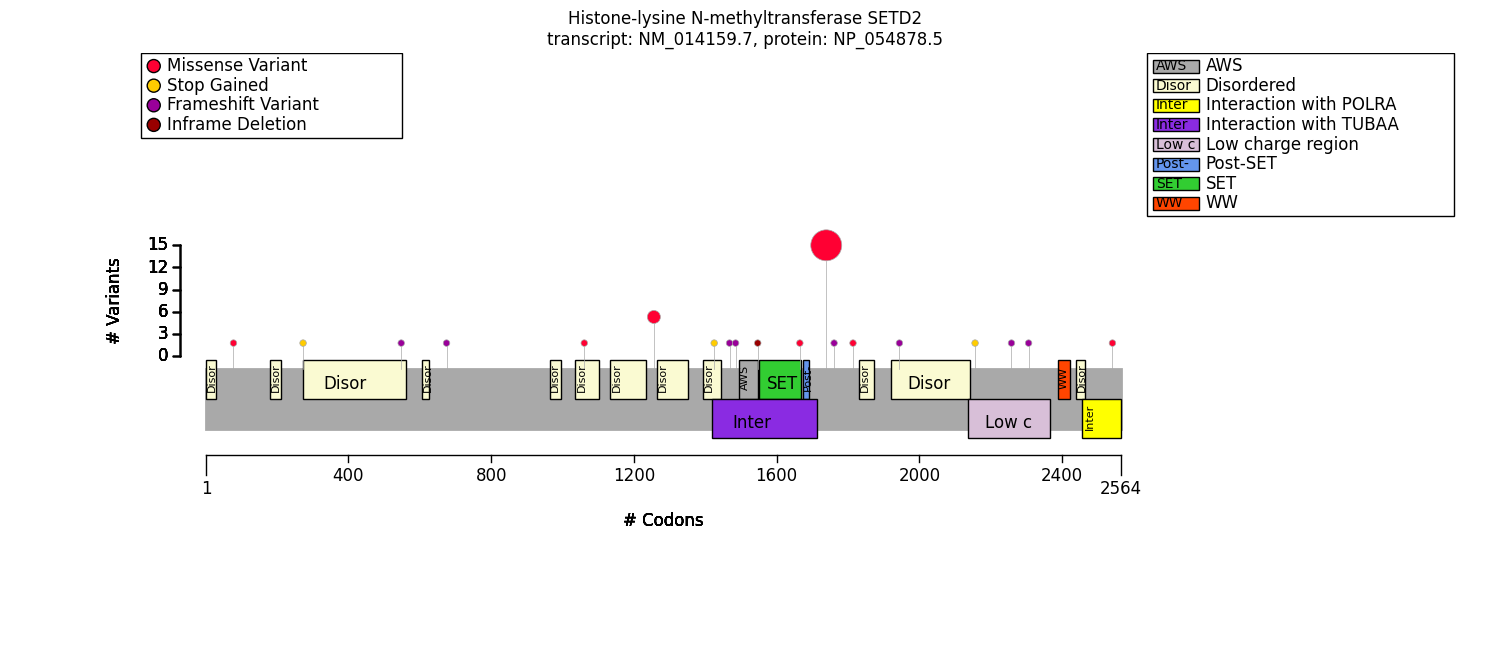

In [7]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
sectd2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
sectd2_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [11]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

r1740w = VariantPredicates.variant_key(key="3_47088172_47088172_G_A") # c.5218C>T	p.Arg1740Trp	
r1740q = VariantPredicates.variant_key(key="3_47088171_47088171_C_T") # c.5219G>A	p.Arg1740Gln

r1740w_predicate = monoallelic_predicate(a_predicate=r1740w, 
                                            b_predicate=~r1740w, 
                                            a_label="Arg1740Trp",
                                             b_label="Other")

r1740w_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=r1740w_predicate,
    pheno_predicates=pheno_predicates,
)


viewer = MtcStatsViewer()
viewer.process(r1740w_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,70
HMF08,Skipping general term,106
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,447


In [12]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=r1740w_result)

Allele group                                       Arg1740Trp  ...          
                                                        Count  ...  p values
Macrocephaly [HP:0000256]                                0/11  ...  0.000390
Hypertelorism [HP:0000316]                              11/11  ...  0.000589
Obesity [HP:0001513]                                      0/9  ...  0.027034
Global developmental delay [HP:0001263]                   9/9  ...  0.066544
Premature birth [HP:0001622]                             6/12  ...  0.089519
Delayed speech and language development [HP:000...        8/8  ...  0.291229
Seizure [HP:0001250]                                     5/12  ...  0.398068
Abnormal axial skeleton morphology [HP:0009121]         12/12  ...  1.000000
Abnormal brain morphology [HP:0012443]                  12/12  ...  1.000000
Morphological central nervous system abnormalit...      12/12  ...  1.000000
Neurodevelopmental delay [HP:0012758]                     9/9  ...  1.000000
Neurodevelopmental abnormality [HP:0012759]               9/9  ...  1.000000
Language impairment [HP:0002463]                          8/8  ...  1.000000
Abnormal communication [HP:0034434]                       8/8  ...  1.000000
Abnormality of speech or vocalization [HP:0002167]        8/8  ...  1.000000

[15 rows x 6 columns]

In [10]:
from gpsea.model import VariantEffect
missense = VariantPredicates.variant_effect(effect=VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_predicate = monoallelic_predicate(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=missense_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       Missense         Other  \
                                                      Count Percent Count   
Delayed speech and language development [HP:000...      8/8    100%   8/8   
Neurodevelopmental delay [HP:0012758]                 14/14    100%   9/9   
Neurodevelopmental abnormality [HP:0012759]           15/15    100%   9/9   
Abnormal communication [HP:0034434]                     8/8    100%   8/8   
Abnormal axial skeleton morphology [HP:0009121]       14/14    100%   8/8   
Motor delay [HP:0001270]                                7/7    100%   7/7   
Atypical behavior [HP:0000708]                          6/6    100%   7/7   

Allele group                                                                   \
                                                   Percent Corrected p values   
Delayed speech and language development [HP:000...    100%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormal communication [HP:0034434]                   100%                1.0   
Abnormal axial skeleton morphology [HP:0009121]       100%                1.0   
Motor delay [HP:0001270]                              100%                1.0   
Atypical behavior [HP:0000708]                        100%                1.0   

Allele group                                                 
                                                   p values  
Delayed speech and language development [HP:000...      1.0  
Neurodevelopmental delay [HP:0012758]                   1.0  
Neurodevelopmental abnormality [HP:0012759]             1.0  
Abnormal communication [HP:0034434]                     1.0  
Abnormal axial skeleton morphology [HP:0009121]         1.0  
Motor delay [HP:0001270]                                1.0  
Atypical behavior [HP:0000708]                          1.0

In [13]:
from gpsea.analysis.predicate.genotype import sex_predicate

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=sex_predicate(),
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE  ...          
                                                    Count  ...  p values
Autistic behavior [HP:0000729]                        7/7  ...  0.017405
Broad forehead [HP:0000337]                           5/6  ...  0.018307
Ventriculomegaly [HP:0002119]                        5/10  ...  0.063467
Wide nasal bridge [HP:0000431]                       8/10  ...  0.144796
Severe global developmental delay [HP:0011344]       6/10  ...  0.198381
Intellectual disability [HP:0001249]                  2/6  ...  0.349845
Delayed speech and language development [HP:000...  11/17  ...  0.507244
Macrocephaly [HP:0000256]                            7/17  ...  0.523107
Attention deficit hyperactivity disorder [HP:00...    3/7  ...  0.612616
Scoliosis [HP:0002650]                                4/8  ...  0.647916
Motor delay [HP:0001270]                             6/10  ...  0.659443
Hypertelorism [HP:0000316]                           7/13  ...  0.725376
Global developmental delay [HP:0001263]             12/16  ...  0.729404
Increased head circumference [HP:0040194]             7/7  ...  1.000000
Abnormality of skull size [HP:0000240]                7/7  ...  1.000000
Abnormal axial skeleton morphology [HP:0009121]     14/14  ...  1.000000
Abnormality of the forehead [HP:0000290]            10/10  ...  1.000000
Prominent forehead [HP:0011220]                       2/7  ...  1.000000
Abnormal brain morphology [HP:0012443]              12/12  ...  1.000000
Morphological central nervous system abnormalit...  12/12  ...  1.000000
Neurodevelopmental delay [HP:0012758]               14/14  ...  1.000000
Neurodevelopmental abnormality [HP:0012759]         14/14  ...  1.000000
Language impairment [HP:0002463]                    11/11  ...  1.000000
Abnormal communication [HP:0034434]                 11/11  ...  1.000000
Abnormality of speech or vocalization [HP:0002167]  11/11  ...  1.000000
Hypotonia [HP:0001252]                                5/8  ...  1.000000
Delayed ability to walk [HP:0031936]                 6/11  ...  1.000000

[27 rows x 6 columns]

# Summary

In [ ]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=r1740w_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = "The origin of clinical diversity in patients with SEC61A1 mutation is currently unclear. With our present patient set, a particular phenotype cannot be predicted on the basis of location or nature of the mutation (PMID:32325141)."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)